# Study calibrated  spectra for HD111980 data 09 jun 2017
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS FRANCE
- creation date   : 10th October 2017
- update : 11th October 2017




In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
StudyCalibratedSpectra
ccdproc version 1.3.0.post1
bottleneck version 1.3.2
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_09jun17/HD111980


In [5]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")


Bad key "axes.color_cycle" on line 215 in
../../templates/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [6]:
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'figure.figsize' : (10, 5)})

In [7]:
 from scipy import interpolate

# Initialisation

## Input fits file

- containing the calibrated spectra

In [8]:
inputdir="./spectrum_calibspec"
MIN_IMGNUMBER=4
MAX_IMGNUMBER=28
date="20170609"
object_name='HD111980'
tag = "calibSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output directory

In [9]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./study_calibspec"
ensure_dir(outputdir)

# Open input file

In [10]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [11]:
all_dates,all_airmass,all_titles,all_header,all_expo, all_leftspectra_data,all_rightspectra_data, all_leftspectra_data_stat_err , all_rightspectra_data_stat_err ,all_leftspectra_wl,all_rightspectra_wl,all_filt,all_filt1,all_filt2=BuildCalibSpec(sorted_files,sorted_numbers,object_name)

# Disperser Sorting

In [12]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [13]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  [0 1 2 3 4 5]
dia Thor300  	 : filt1_idx ::  []
dia HoloPhP  	 : filt2_idx ::  []
dia HoloPhAg  	 : filt3_idx ::  []
dia HoloAmAg  	 : filt4_idx ::  []
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


# Show Spectra

/Users/dagoret/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


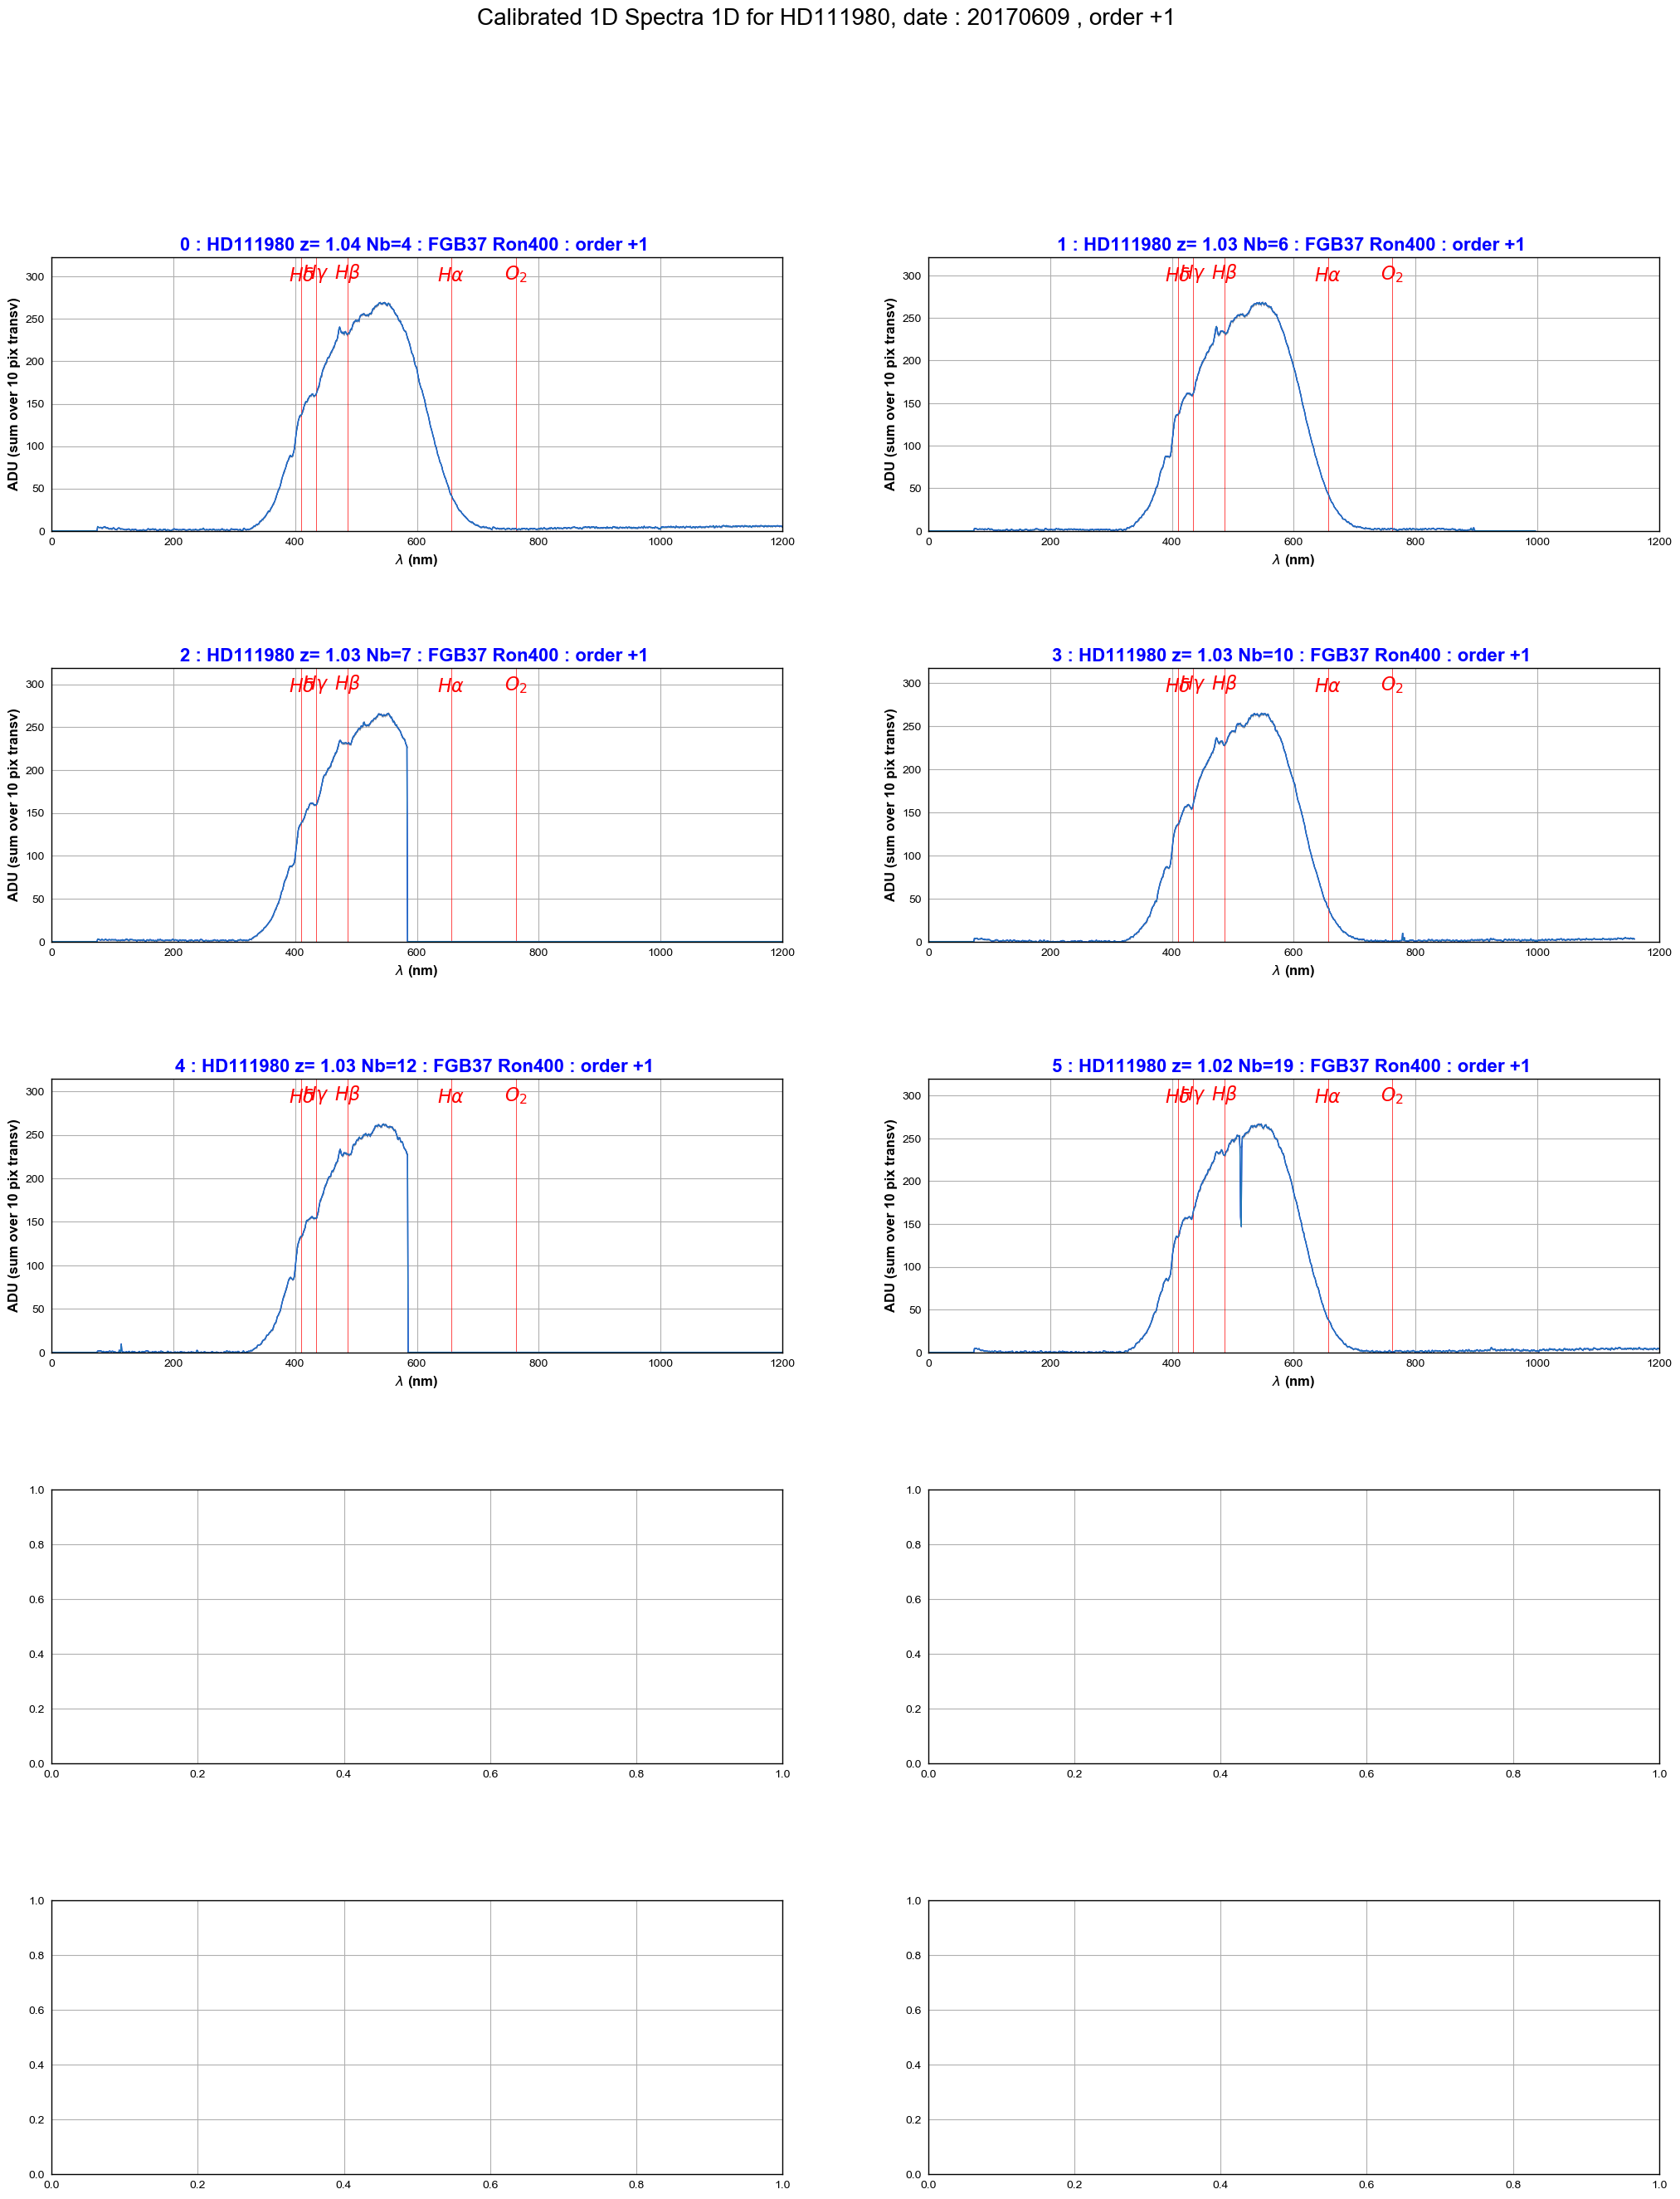

In [14]:
ShowCalibSpectrainPDF(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_right.pdf','order +1')

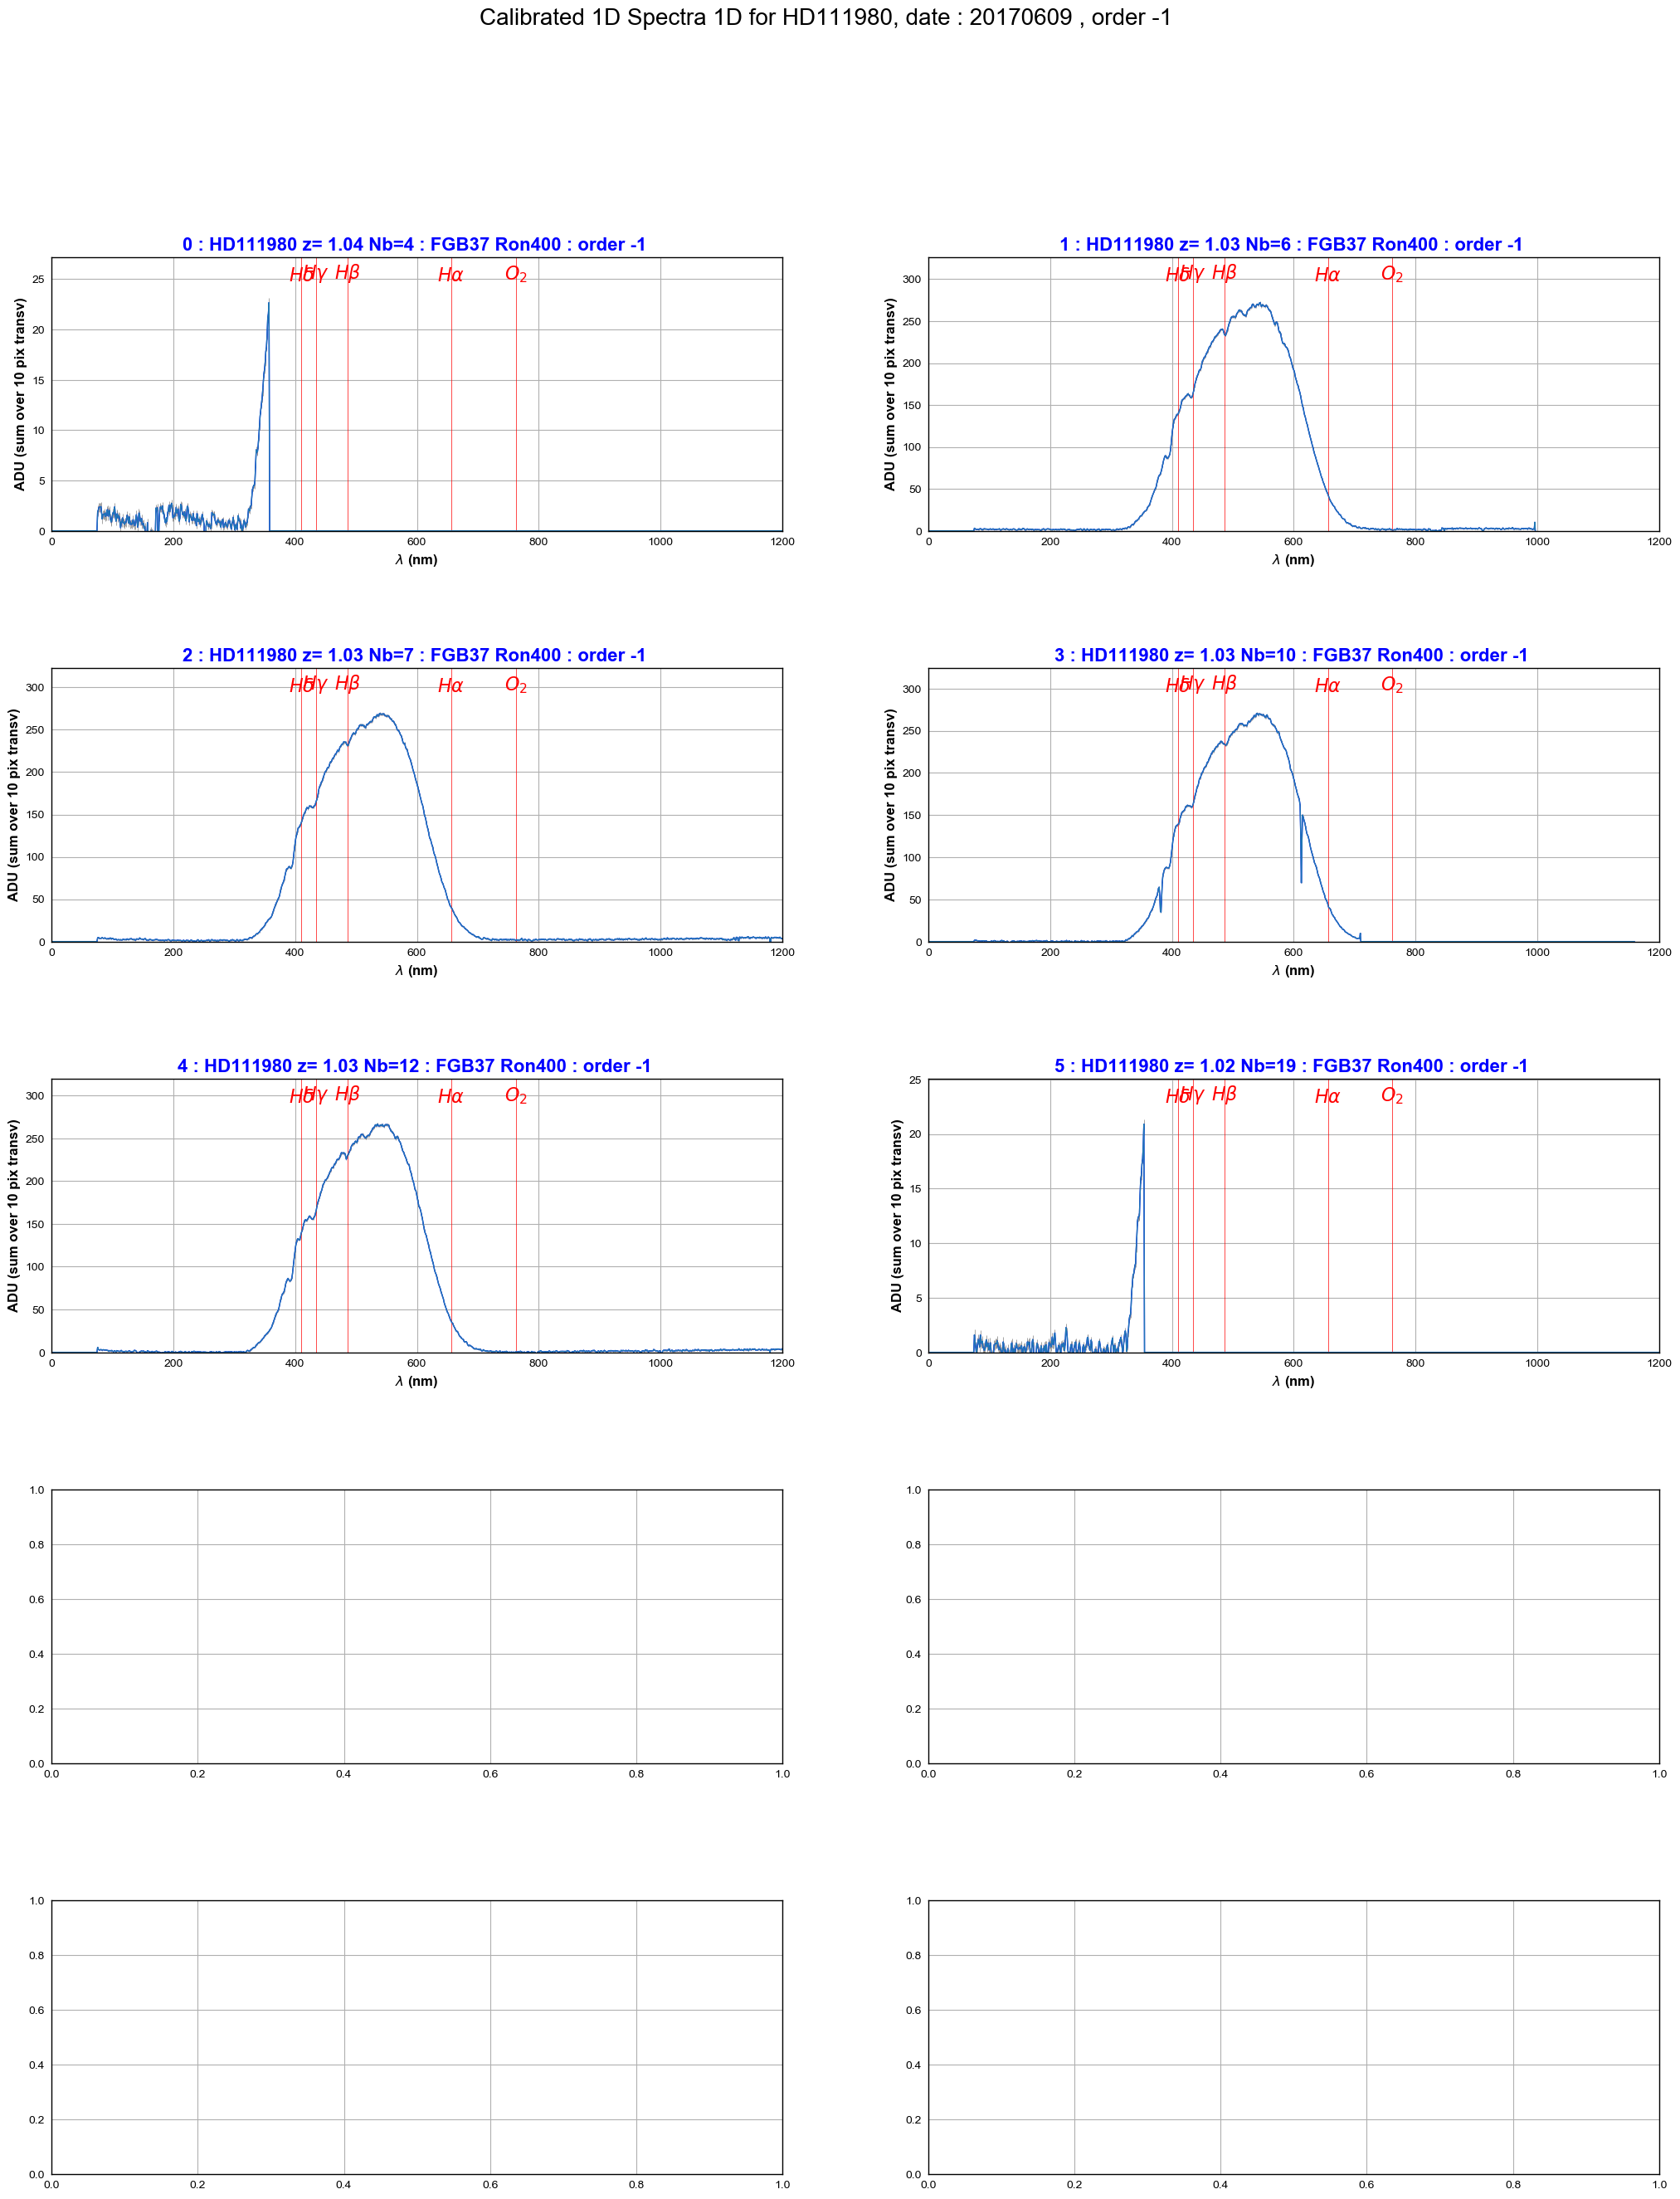

In [15]:
ShowCalibSpectrainPDF(all_leftspectra_data,all_leftspectra_data_stat_err,all_leftspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_left.pdf','order -1')

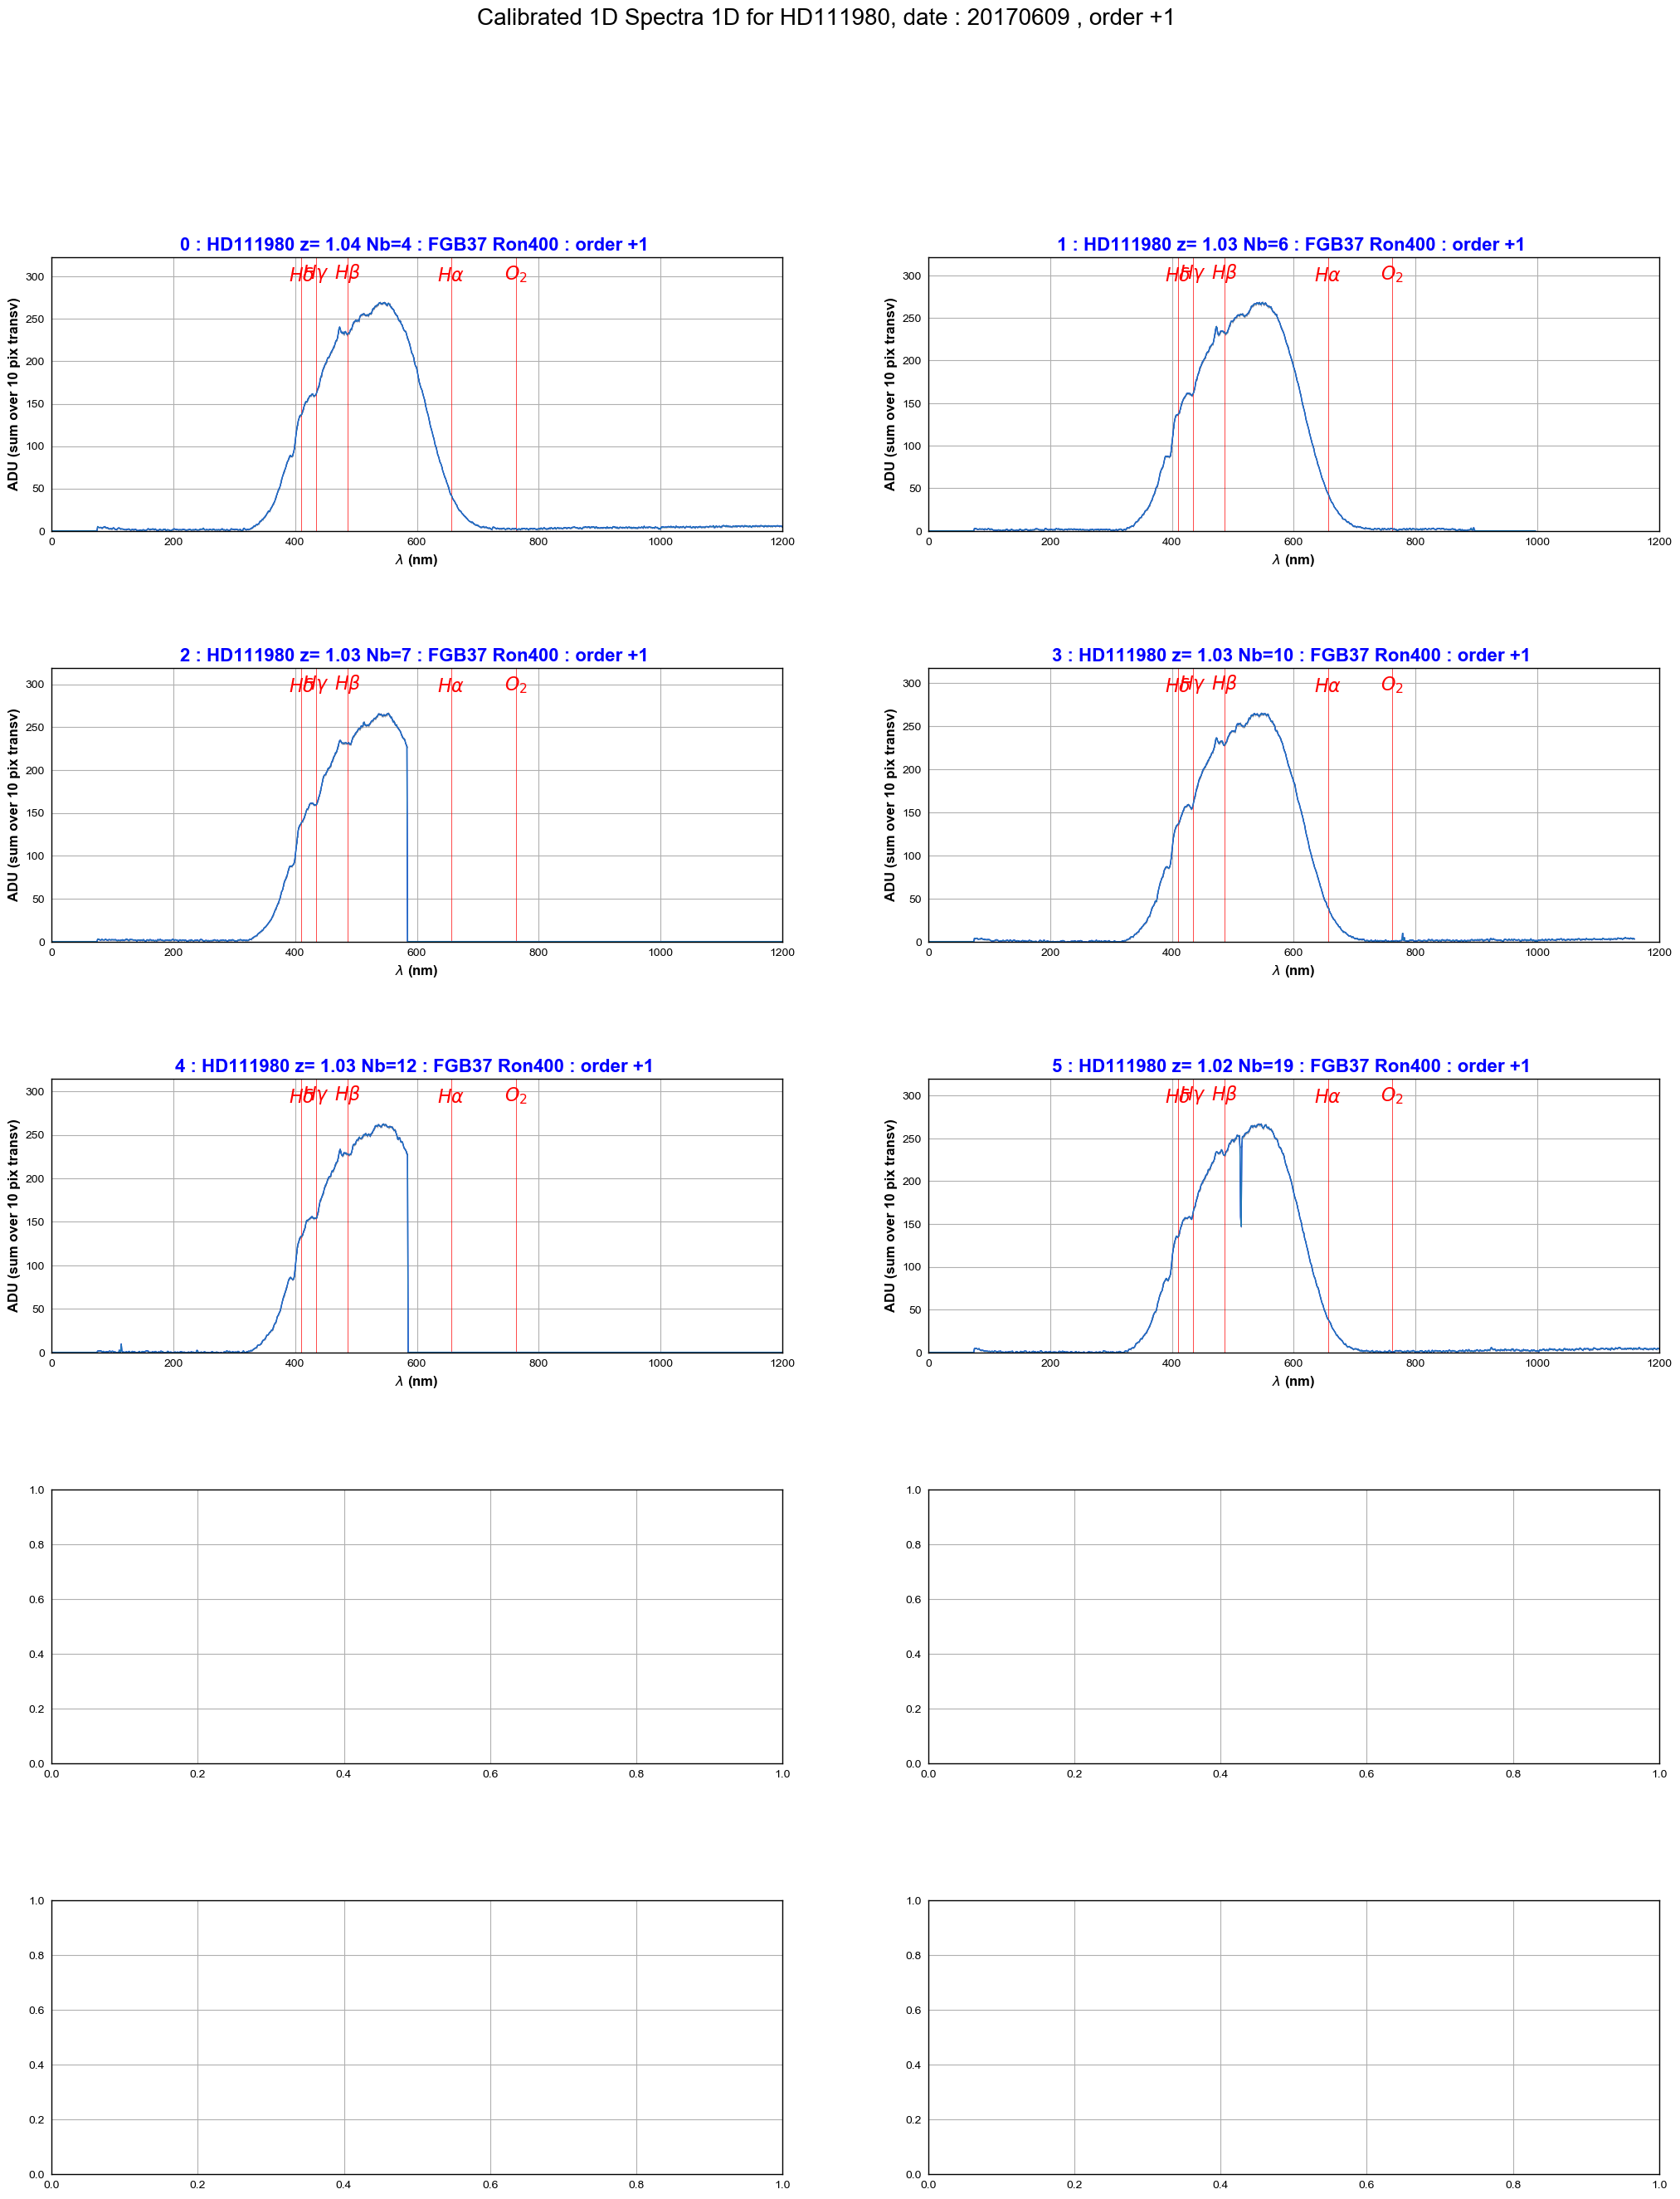

In [16]:
ShowCalibSpectrainPDFSelect(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,all_filt1,all_filt2,date,'calib1DspectraSel_right.pdf','order +1')

# To study contamination by order 2 ==> Select FGB37 Filter data

## Find the indexes with tag FGB37

In [17]:
all_filt1=np.array(all_filt1)
Selected_Indexes=np.where(all_filt1=='FGB37')[0]

In [18]:
Selected_Indexes

array([0, 1, 2, 3, 4, 5])

In [34]:
#Selected_Indexes=np.delete(Selected_Indexes,[1,2,3,4,5])

In [35]:
#Selected_Indexes

## Remember the corresponding filters and disperser

In [36]:
all_filt2=np.array(all_filt2)
Selected_Dispersers=all_filt2[Selected_Indexes]

In [37]:
Selected_Dispersers

array(['Ron400'], dtype='|S6')

In [38]:
all_filt=np.array(all_filt)
Select_Filt=all_filt[Selected_Indexes]

## Build X, Y and interpolation function

In [39]:
all_interpolate = [] # interpolation functions
all_spc= []          # spectrum
lambdas=np.linspace(300.,1100.,800) # spectrum wavelength domain
for idx in Selected_Indexes:
    index=idx
    print index
    # define (x,y)    
    x=all_rightspectra_wl[index]
    y=all_rightspectra_data[index]
    # interpolation function y = f(x)
    f = interpolate.interp1d(x, y)
    # calculate y=f(x), where x are the tabulated lambdas
    spc=f(lambdas)
    # save in container
    all_interpolate.append(f)
    all_spc.append(spc)

0


### Check the interpolation

(600.0, 1100.0)

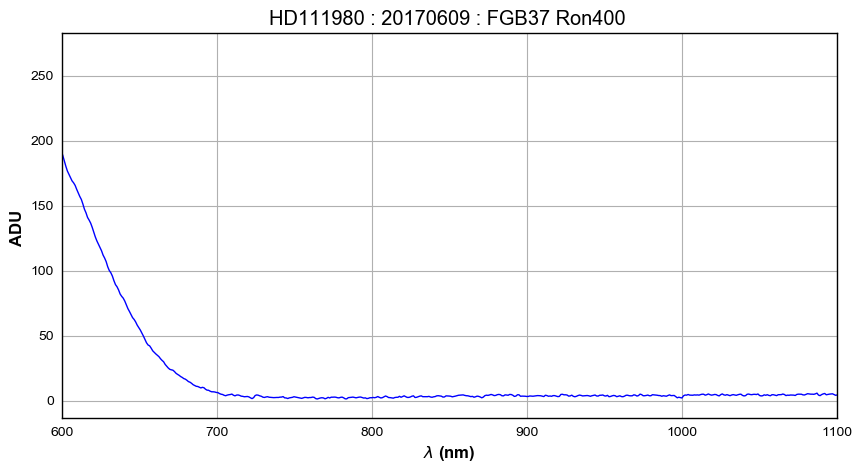

In [40]:
sel=0
title="{} : {} : {} ".format(object_name,date,Select_Filt[sel])
plt.title(title)
plt.plot(lambdas,all_spc[sel],'b-')
plt.xlabel("$\lambda$ (nm) ")
plt.ylabel("ADU ")
plt.xlim(600.,1100.)

In [41]:
from IPython.display import Latex

# Compute the ratio 


$$
\begin{equation}
Y = \frac{Y(\lambda)}{Y(\lambda / 2)}
\end{equation}
$$

In [42]:
def GiveContamination(wavelength,spectrum,interpol_f):
    """
    Compute contamination
    
    input:
        - wavelength : array of wavelength
        - spectrum   : spectrum
        - interpol_f : interpolation function
    """
    X=wavelength # range 300 nm - 1100 nm
    XMIN=np.min(X)
    XMAX=np.max(X)
    Yfullscale=spectrum
    
    Xhalf=X/2.  # range 150 nm - 550 nm
    #find indexes which are in the range XMIN-XMAX
    sel_index=np.where(np.logical_and(Xhalf>=XMIN,Xhalf<=XMAX))[0] # half must be in wl domain
    
    wl_sel=X[sel_index]
    
    Xcut=X[sel_index]
    Ycut=Yfullscale[sel_index]
    Xhalf_cut=Xhalf[sel_index]  # wavelength lambdas/2 in the wl domain
    Yhalf_cut=interpol_f(Xhalf_cut)  # interpolate the spectrum at half lambda
    ratio= Ycut/Yhalf_cut
    return wl_sel,ratio    

In [44]:
def PlotContamination(wavelength,spectrum,interpol_f,grating_name):
    wl,r=GiveContamination(wavelength,spectrum,interpol_f)
    thetitle=grating_name
    
    plt.figure(figsize=(10,5))
    plt.title(thetitle)
    plt.plot(wl,r,'b-',lw=2)
    plt.xlim(650.,1100.)
    plt.ylim(0.,0.5)
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("Y($\lambda$)/Y($\lambda$/2)")

In [45]:
def PlotContaminationinPDF(wavelength,spectrum,interpol_f,title,dir_top_img,figname):
    
    figfilename=os.path.join(dir_top_img,figname)
    
    wl,r=GiveContamination(wavelength,spectrum,interpol_f)
    
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
    f.suptitle(title,size=20)
    ax1.plot(wavelength,spectrum,'b-',lw=2)
    ax1.set_xlabel("$\lambda$ (nm)")
    ax1.set_ylabel("Y($\lambda$) (ADU)")
    
    ax2.plot(wl,r,'b-',lw=2)
    ax2.set_xlim(800.,1100.)
    ax2.set_ylim(0.,0.3)
    ax2.set_xlabel("$\lambda$ (nm)")
    ax2.set_ylabel("Y($\lambda$)/Y($\lambda$/2)")
    
    f.savefig(figfilename)

In [46]:
def FullPagePlotContaminationinPDF(wavelength,all_spectrum,all_interpol_f,all_disperser,dir_top_img,figname):
    """
    """
    # filename
    figfilename=os.path.join(dir_top_img,figname)
    selected_index=np.array([2,5,0,1,8])
    title="obj : {}, date {}, filter FGB37".format(object_name,date)
    
    f, axarr  = plt.subplots(5, 2,figsize=(20,30))
    f.suptitle(title,size=20)
    
    for idx in range(5):
        sel=selected_index[idx]
        spec=all_spectrum[sel]
        interp=all_interpol_f[sel]
        wl,r=GiveContamination(wavelength,spec,interp)
        smooth_r=smooth(r,window_len=21)
        axarr[idx,0].plot(wavelength,spec,'b-',lw=2)
        axarr[idx,0].set_xlabel("$\lambda$ (nm)")
        axarr[idx,0].set_ylabel(" $Y(\lambda)$ (ADU)")
        thetitle="spectrum ({})".format(all_disperser[sel])
        axarr[idx,0].set_title(thetitle,fontsize=16)
    
        axarr[idx,1].plot(wl,smooth_r,'b-',lw=2)
        axarr[idx,1].set_xlabel("$\lambda$ (nm)")
        axarr[idx,1].set_ylabel("ADU")
        thetitle="spectrum ratio ({})".format(all_disperser[sel])
        axarr[idx,1].set_title(thetitle,fontsize=16)
        axarr[idx,1].set_xlabel("$\lambda$ (nm)")
        axarr[idx,1].set_ylabel("$Y(\lambda / Y(\lambda /2)$)")
        axarr[idx,1].set_ylim(0.,0.3)
        axarr[idx,1].set_xlim(800.,1100.)
    

    
    f.savefig(figfilename)

In [31]:
def FullPagePlotContaminationinPDF2(wavelength,all_spectrum,all_interpol_f,all_disperser,dir_top_img,figname):
    """
    """
    # filename
    figfilename=os.path.join(dir_top_img,figname)
    selected_index=np.array([2,5,0,1,8])
    pencil=['r-','b-','g-','c-','m-']
    title="obj : {}, date {}, filter FGB37".format(object_name,date)
    
    f, axarr  = plt.subplots(1, 2,figsize=(20,5))
    f.suptitle(title,size=20)
    
    for idx in range(5):
        sel=selected_index[idx]
        spec=all_spectrum[sel]
        interp=all_interpol_f[sel]
        thelabel=all_disperser[sel]
        wl,r=GiveContamination(wavelength,spec,interp)
        smooth_r=smooth(r,window_len=21)
        if idx==2:
            axarr[0].plot(wavelength,spec,pencil[idx],lw=2,label=thelabel)
            axarr[0].set_xlabel("$\lambda$ (nm)")
            axarr[0].set_ylabel(" $Y(\lambda)$ (ADU)")
            axarr[0].legend(loc=1)
            thetitle="spectrum ({})".format(all_disperser[sel])
            axarr[0].set_title(thetitle,fontsize=16)
    
        axarr[1].plot(wl/2.,smooth_r,pencil[idx],label=thelabel,lw=2)
        axarr[1].set_xlabel("$\lambda$ (nm)")
        axarr[1].set_ylabel("ADU")
        thetitle="spectrum ratio"
        axarr[1].set_title(thetitle,fontsize=16)
        axarr[1].set_xlabel("$\lambda$ (nm)")
        axarr[1].set_ylabel("$Y(\lambda / Y(\lambda /2)$)")
        axarr[1].set_ylim(0.,0.5)
        axarr[1].set_xlim(400.,550.)
        axarr[1].legend(loc=1)
    

    
    f.savefig(figfilename)

IndexError: list index out of range

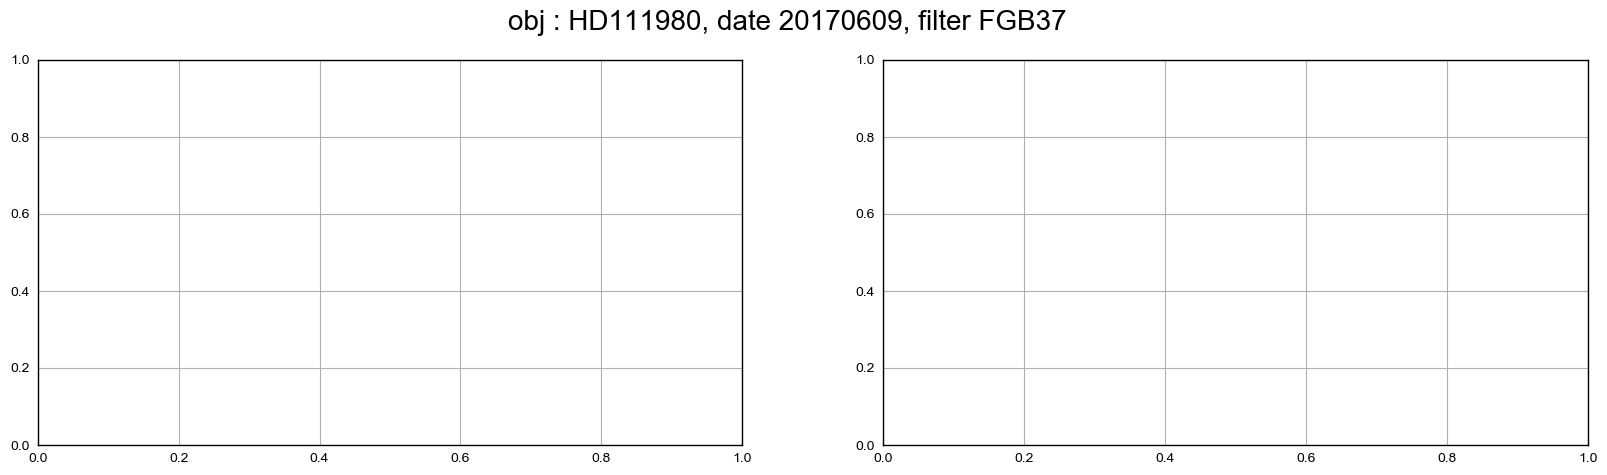

In [47]:
FullPagePlotContaminationinPDF2(lambdas,all_spc,all_interpolate,Selected_Dispersers,dir_top_images,"combinaison_contamin2.pdf")

IndexError: list index out of range

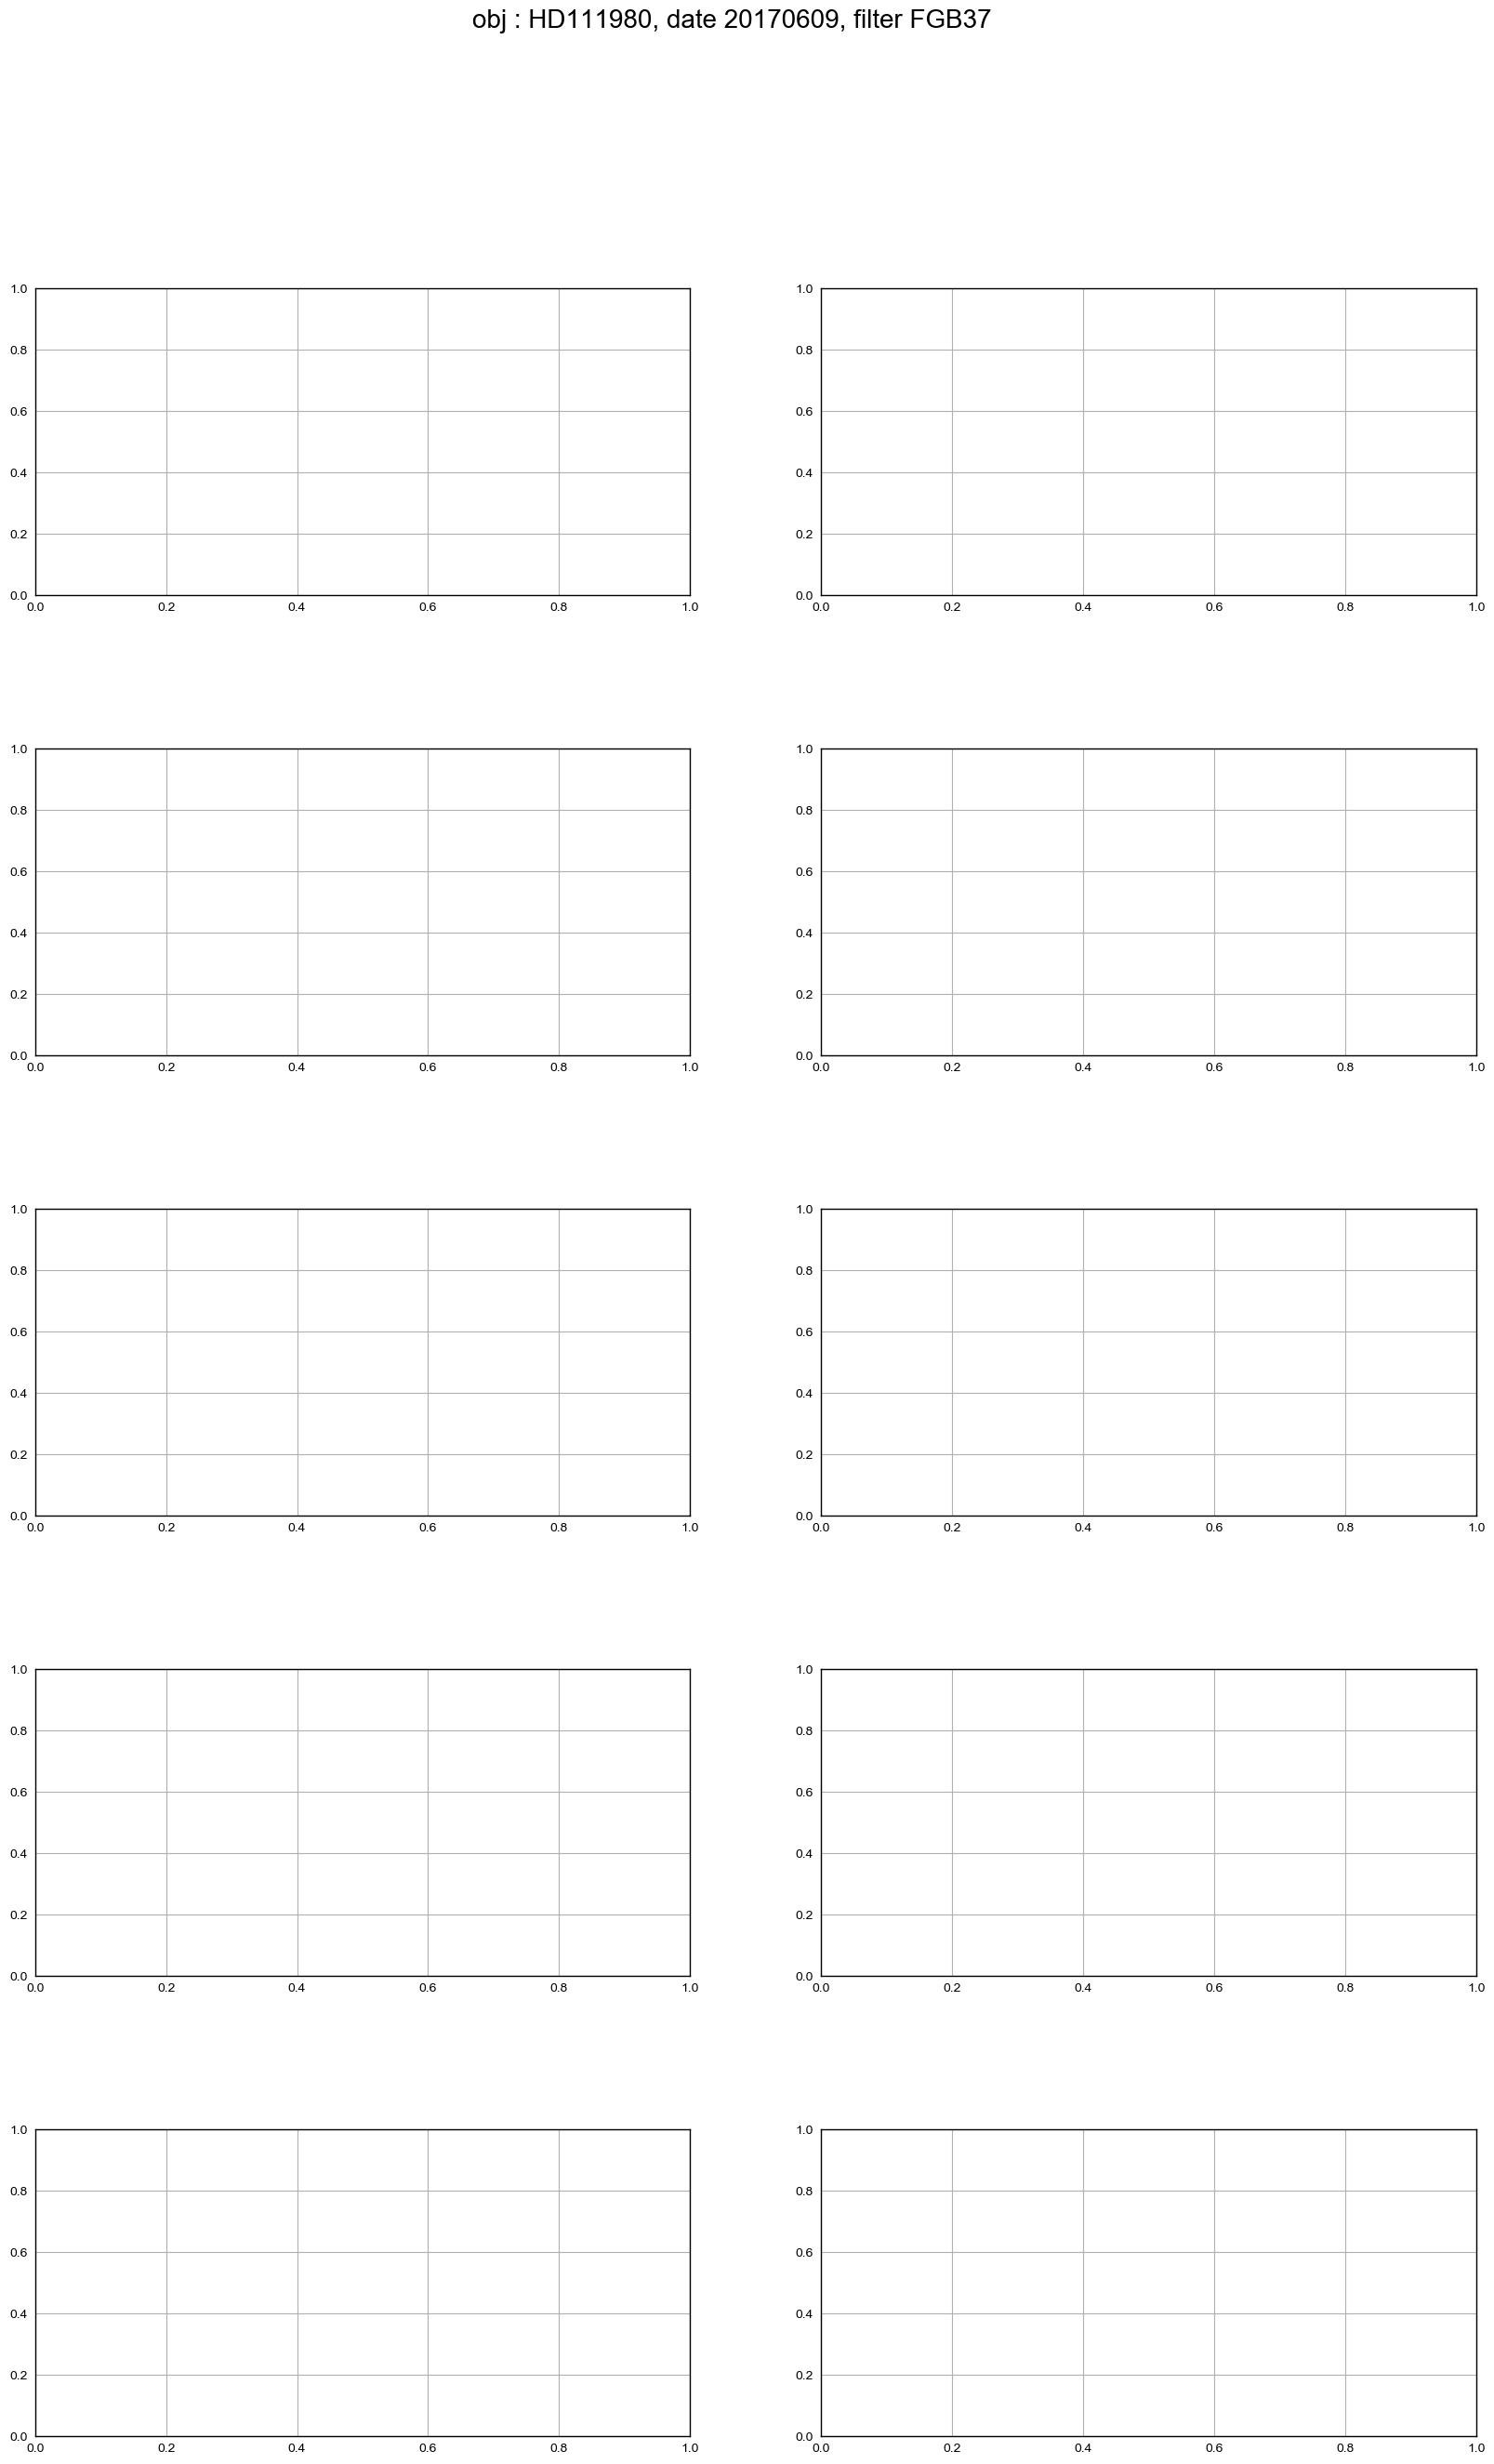

In [33]:
FullPagePlotContaminationinPDF(lambdas,all_spc,all_interpolate,Selected_Dispersers,dir_top_images,"combinaison_contamin.pdf")

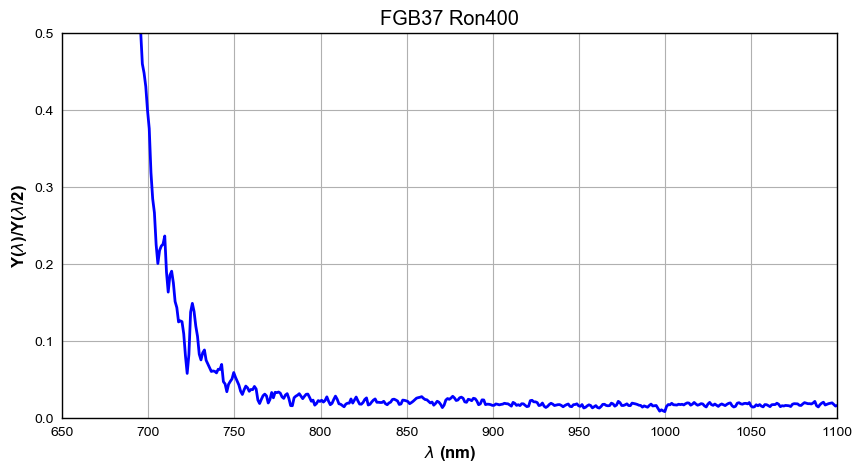

In [48]:
PlotContamination(lambdas,all_spc[sel],all_interpolate[sel],Select_Filt[sel]) 

In [49]:
wl,r=GiveContamination(lambdas,all_spc[sel],all_interpolate[sel]) 

In [50]:
import pandas as pd
ar = {'wl_ron400': wl, 'cont_ratio_ron400' :r}
df = pd.DataFrame(ar)

In [51]:
df.describe()

,cont_ratio_ron400,wl_ron400
count,500.000000,500.000000
mean,14.383809,850.187735
std,80.331241,144.662661
min,0.008460,600.375469
25%,0.017547,725.281602
50%,0.021672,850.187735
75%,0.106991,975.093867
max,1352.126364,1100.000000


In [52]:
df.to_csv('contamination_ron400.csv')

# Loop

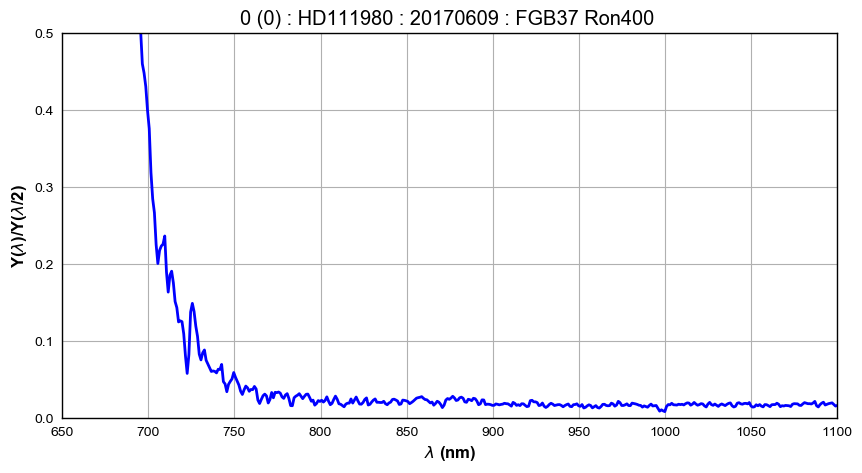

In [53]:
for sel in np.arange(len(Selected_Indexes)):
    title="{} ({}) : {} : {} : {} ".format(sel,Selected_Indexes[sel],object_name,date,Select_Filt[sel])
    PlotContamination(lambdas,all_spc[sel],all_interpolate[sel],title) 

# Produce plots in pdf 

In [ ]:
sel=2
title="{} : {} : {} ".format(object_name,date,Select_Filt[sel])
figname='contamination_{}_{}.pdf'.format(Selected_Dispersers[sel],sel)
PlotContaminationinPDF(lambdas,all_spc[sel],all_interpolate[sel],title,dir_top_images,figname)

IndexError: index 2 is out of bounds for axis 0 with size 1

In [ ]:
sel=5
title="{} : {} : {} ".format(object_name,date,Select_Filt[sel])
figname='contamination_{}_{}.pdf'.format(Selected_Dispersers[sel],sel)
PlotContaminationinPDF(lambdas,all_spc[sel],all_interpolate[sel],title,dir_top_images,figname)

In [ ]:
sel=0
title="{} : {} : {} ".format(object_name,date,Select_Filt[sel])
figname='contamination_{}_{}.pdf'.format(Selected_Dispersers[sel],sel)
PlotContaminationinPDF(lambdas,all_spc[sel],all_interpolate[sel],title,dir_top_images,figname)

In [ ]:
sel=1
title="{} : {} : {} ".format(object_name,date,Select_Filt[sel])
figname='contamination_{}_{}.pdf'.format(Selected_Dispersers[sel],sel)
PlotContaminationinPDF(lambdas,all_spc[sel],all_interpolate[sel],title,dir_top_images,figname)

In [ ]:
sel=8
title="{} : {} : {} ".format(object_name,date,Select_Filt[sel])
figname='contamination_{}_{}.pdf'.format(Selected_Dispersers[sel],sel)
PlotContaminationinPDF(lambdas,all_spc[sel],all_interpolate[sel],title,dir_top_images,figname)